
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Engineering math (25735) <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>

<font color=3C99D size=5>
From Noise to Clarity - Fall 2024<br>

<font color=696880 size=4>
Amitis Mirabedini

### Information  


In [26]:
full_name = 'Amitis Mirabedini'
student_id = '402102562'

## <span style="color:blue">2. Aspects of an Image </span>



### 2.1 Questions

<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
1. Intuitively, What do low and high frequencies of an arbitrary image contain? Which
one is more important? Do you think your answer depends on the image? Explain it.
</span>


<span style="color:blue; font-size:20px;">Intuition</span>


In high frequencies we have a more detailed and sharp image of what we are trying to observe, when in a part of our image the frequency is high it means we have more details of a specific part of the image, for example considering Figure 1, the basketball player, his ball and his body posture are shown with detail which means we are capturing these parts with high frequency and so we can see the details, even the small dots on the player's shirt is apparent in our image, but when we are dealing with low frequencies the image would be rather more smooth and not detailed. In images, low frequencies are mostly used to show the general outline of the image. As we can see the background of the basketball player is smooth and not apparent so we can't see the audience and the environment around Kobe Bryant with full detail. So we can conclude here that when we have low frequencies it's like when we have less information and detail and we are trying to just capture an approximation of what that part of the image looks like.  


<span style="color:blue; font-size:20px;">Importance</span>

In case of importance we can't really determine one of them as more important as each of them may be more important for different applications.   
For example when we intend to capture the details of an image, for capturing the texture, or analyzing details in celestial images such as stars and galaxies we are going to need details and so high frequency is necessary.    
But when we are trying to get the overall image, without details, and our domain may be large so capturing all the details with high frequency might be hard or impossible, we use low frequencies. 
In some images like figure 1 we might have a combination of these two.

<span style="color:blue; font-size:20px;">Dependence</span>

Of course it does, the goal of our image is what determines the importance of high or low frequencies, like I have explained above each of them are used for different applications and sometimes both of them should be used at the same time to get the desired result.



<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
2. Explain about low pass filter(LPF) and high pass filter(HPF) . In what applications
LPF and HPF are used? Write two functions that apply LPF and HPF to an arbitrary
image.
</span>


Low Pass Filter (LPF):  
This filter only allows low_frequency components of an image to pass and high frequencies will be suppressed. This means high frequency details such as edges, sharp trasitions, noise are reduced or removed and we have a softened version of the image with less noise or sharpness showing the overall structure.  

High Pass Filter (HPF):  
This is the opposit of a LPF. It only allows high_frequency components of an image to pass and low frequencies will be suppressed. This allows the image to represent an enhanced and detailed version of the image or the signal.

A Gaussian Blur is used to implement the LPF.
An HPF is implemented by substracting the low passs filtered version of the image from the original image.

<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">


<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">

3.Apply LPF and HPF to pic1.jpg using functions written in the previous part. Explain
 the results.

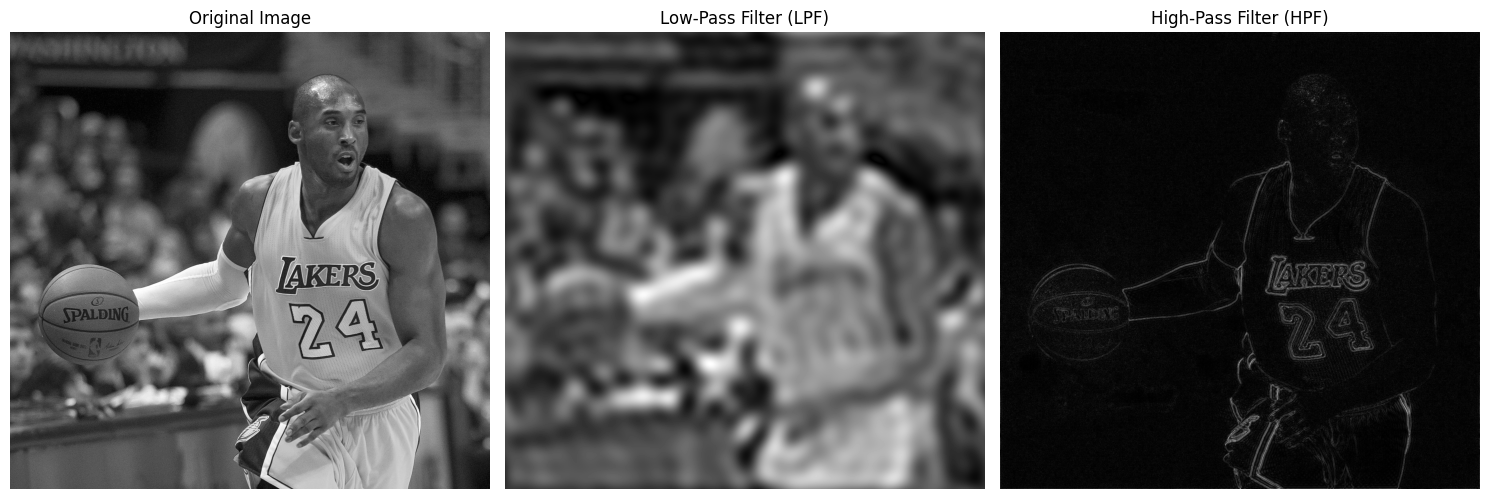

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_lpf_fft(image, cutoff):
    #Fourier Transform
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    #Create Low-Pass Mask
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (center_col, center_row), cutoff, 1, -1)

    #Apply Mask
    filtered_dft = dft_shift * mask

    #Inverse Fourier Transform
    idft_shift = np.fft.ifftshift(filtered_dft)
    img_filtered = np.fft.ifft2(idft_shift)
    img_filtered = np.abs(img_filtered)

    return img_filtered

def apply_hpf_fft(image, cutoff):
    #Fourier Transform
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    #Create High-Pass Mask
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    cv2.circle(mask, (center_col, center_row), cutoff, 0, -1)

    #Apply Mask
    filtered_dft = dft_shift * mask

    #Inverse Fourier Transform
    idft_shift = np.fft.ifftshift(filtered_dft)
    img_filtered = np.fft.ifft2(idft_shift)
    img_filtered = np.abs(img_filtered)

    return img_filtered


file_path = r"C:\Users\Notebook\Downloads\pic1.jpg"
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded
if image is None:
    print("Error: Unable to load the image. Check the file path.")
else:
    lpf_image = apply_lpf_fft(image, cutoff=20)
    hpf_image = apply_hpf_fft(image, cutoff=100)

    
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Low-Pass Filter (LPF)")
    plt.imshow(lpf_image, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("High-Pass Filter (HPF)")
    plt.imshow(hpf_image, cmap='gray')
    plt.axis("off")

    plt.tight_layout()
    plt.show()


<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
1. Plot the magnitude and phase of both images. Then, plot an image with magnitude
 of pic2.jpg and phase of pic3.jpg. Plot the other alternate.

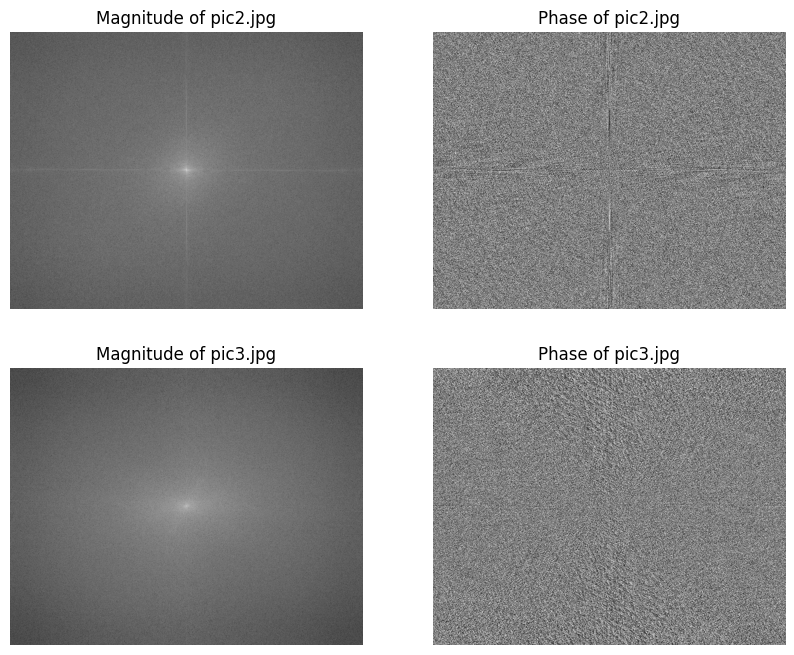

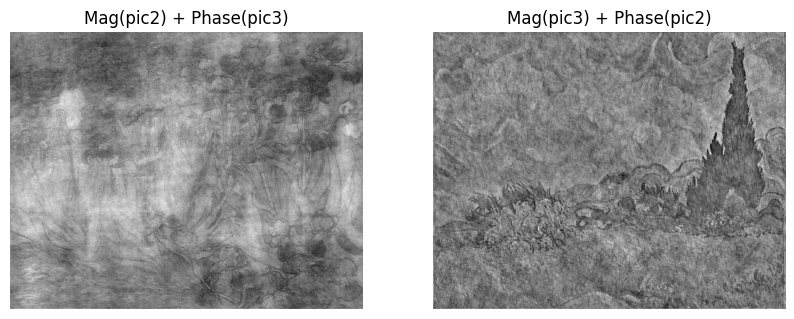

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('pic2.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('pic3.jpg', cv2.IMREAD_GRAYSCALE)

min_height = min(img1.shape[0], img2.shape[0])
min_width = min(img1.shape[1], img2.shape[1])

img1_resized = cv2.resize(img1, (min_width, min_height))
img2_resized = cv2.resize(img2, (min_width, min_height))

f1 = np.fft.fft2(img1_resized)
f2 = np.fft.fft2(img2_resized)

f1_shift = np.fft.fftshift(f1)
f2_shift = np.fft.fftshift(f2)

magnitude1, phase1 = np.abs(f1_shift), np.angle(f1_shift)
magnitude2, phase2 = np.abs(f2_shift), np.angle(f2_shift)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].imshow(np.log(1 + magnitude1), cmap='gray')
axes[0, 0].set_title("Magnitude of pic2.jpg")

axes[0, 1].imshow(phase1, cmap='gray')
axes[0, 1].set_title("Phase of pic2.jpg")

axes[1, 0].imshow(np.log(1 + magnitude2), cmap='gray')
axes[1, 0].set_title("Magnitude of pic3.jpg")

axes[1, 1].imshow(phase2, cmap='gray')
axes[1, 1].set_title("Phase of pic3.jpg")

for ax in axes.ravel():
    ax.axis("off")

plt.show()

# Swap magnitude and phase
f1_new = magnitude1 * np.exp(1j * phase2)  # Magnitude of pic2, Phase of pic3
f2_new = magnitude2 * np.exp(1j * phase1)  # Magnitude of pic3, Phase of pic2

img1_reconstructed = np.fft.ifft2(np.fft.ifftshift(f1_new)).real
img2_reconstructed = np.fft.ifft2(np.fft.ifftshift(f2_new)).real

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img1_reconstructed, cmap='gray')
axes[0].set_title("Mag(pic2) + Phase(pic3)")

axes[1].imshow(img2_reconstructed, cmap='gray')
axes[1].set_title("Mag(pic3) + Phase(pic2)")

for ax in axes:
    ax.axis("off")

plt.show()


<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
2. Using the results above, Explain Why is the phase information more critical for recon
structing recognizable features of an image compared to the magnitude information

As we observe in the two last results, the image containing the magnitude of pic2 and phase of pic3 shows the essential information and the overall shape of pic3 and viceversa for the image containing Magnitude of pic3 and Phase of pic2 as well.  
So, we can conclude that phase carries essential information about edges, shapes,...  
While, magnitude controls conteast and intensity but doesn't define structure and so phase is more important when analyzing the features of an image as stated in the question.

## <span style="color:blue">3. Noise </span>

### 3.1 Questions

<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
1. What are the primary sources of salt-and-pepper noise in digital images, and what
filtering techniques are most effective in mitigating this type of noise?
</span>


<span style="color:blue; font-size:20px;">What is salt-and-pepper noise?</span>


Salt and pepper noise is a type of image noise that appears as randomly distributed black and white pixels. White pixels (Salt noise) have the highest intensity value, They appear when a pixel's value it suddenly set to maximum brightness, making it look like a small white dot. On the other hand, Black pixels (Pepper noise) have the lowest intensity. They occur when a pixel's value is forced to complete darkness, creating tiny black spots.

<span style="color:blue; font-size:20px;">Primary Sources</span>  
<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
1.Transmission errors:  </span>  

When images are sent over a communication channel (like Wi-fi or cable), data can get corrupted, causing pixel values to jump to 0 (black) or 255 (white).  


<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
2.Faulty camera sensors:  </span>   

Defective pixels in an image sensor can sometimes produce bright or dark spots and introduce noise into images in other words.

<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
3. Analog-to-digital conversion issues:  </span>

If an image is digitized incorrectly or the electronics introduce spikes, you make see these points. 

<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
4. Atmospheric disturbances:  </span>

External noise sources like atmospheric disturbances can introduce noise into images.




<span style="color:blue; font-size:20px;">Filtering techniques</span>  
Since this noise consists of random black and white pixels, we need filters that can remove extreme outliers while keeping the real image details intact. Most common and effective way to filter this noise is using Median Filter. This filter looks at a small neighberhood of pixels, it sorts all pixel values in the window and replaces the central pixel with the median value(the middle number in sorted order) and because salt-and-pepper noise is usually an extreme value, it gets ignored in favor of the real surrounding pixels values.  
Another method is Adpative Median Filter which is an improved version of Median Filter. This is very similar to the median filter, but it adjust the window size nased on the amount of noise meaning of a pixel is identified as noisy, the filter expands the window until it finds a stable median value.   
In general these two methods are used when we are dealing with a normal case of salt-and-pepper noise. For special cases like when the noise is unbalanced, or binary-like noise patterns we may use different techniques.



<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
2. How does electrical interference introduce 50Hz noise into signal recordings, and what
methods can be employed to eliminate or reduce this interference?
</span>

50Hz noise is electrical interference that gates into your signal recordings, creating an unwanted hum or distortion. This happens because of the power supply frequency use in electrical grids like Europe, Asia, and most of the world which is 50 Hz.   
Power cables running close to your recording act like antennas and cause 50Hz noise into your signal. There might also be a grounding problem, if our equipment is not properly grounded, stray electrical currents create a ground loop, introducing hum to the signal. Also unshielded or poorly shielded cables can pick up the interference like radio antennas.
We can use Hardware and Software filters to eliminate or reduce this inteference. Low-pass filters or notch filters(50Hz) can be used, Notch filter at 50Hz eliminates the inteference without affecting other frequencies, Also Band-stop filter can block a small range around 50 Hz. Aside from using these filters we can check the grounding to make sure all our equipment is properly grounded, we should also check the shielding of the cables to prevent inteference as well.

<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
3. Identify the common sources of Gaussian noise in imaging systems and discuss the
most suitable algorithms for its removal without significantly degrading image quality.
</span>

Gaussian noise is a type of noise in digital images (and signals) that follows a bell-shaped (Gaussian) distribution. In other words, most noise values cluster around the average (mean) gray level, with fewer extremely high or low noise values.  
Common sources of Gaussian noise can be as follows:  
1.Thermal Noise in Sensors:  

Image sensors (like CCD or CMOS) produce a small amount of “thermal” current even when no light hits them.  
This creates random variations in the output signal that follow a Gaussian pattern.

2.Photon Noise:  

Every amplifier or circuit that processes the sensor’s signal contributes a small random “hum” or fluctuation.  
These fluctuations often sum up to form Gaussian noise.

3.Data Conversion:

When analog signals are converted to digital (through an analog-to-digital converter, ADC), small rounding or quantization errors can accumulate.  
These errors are random and often behave like Gaussian noise over large image areas.

Methods to use are as following:

1.Gaussian Smoothing Filter:

It convolves the image with a Gaussian “bell-shaped” kernel that smooths out pixel variations.

2.Wiener Filter:  

It uses statistical properties of noise and the image signal to find an optimal way of filtering in the frequency domain.  

3.Bilateral Filter:  

It smooths an image by averaging pixels that are close in intensity and close in spatial distance.


<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
4. Explore SNR and PSNR. What roles do Signal-to-Noise Ratio (SNR) and Peak Signalto-Noise Ratio (PSNR) play in evaluating the effectiveness of noise removal techniques
in digital images? Compare and contrast the effectiveness of SNR and PSNR in different
applications such as medical imaging, video compression, and wireless communications.

</span>

<span style="color:blue; font-size:20px;">SNR(Signal-to-Noise Ratio)</span> compares the overall power of a signal to the power of background noise. In simpler terms, it tells us how loud and clear the signal is compared to the unwanted noise.

<span style="color:blue; font-size:20px;">PSNR(Peak Signal-to-Noise Ratio)</span> is closely realted to SNR but focuses on the maximum possible value of the signal, for images or videos this usually means the brightest pixel value, by comapring the peak signal level to the noise, PSNR shows how much the noise affects the strongest parts of the signal.  
Both SNR and PSNR are usually measured in dB, and higher values mean better quality(less noise).  

<span style="color:blue; font-size:20px;">Role in Evaluating Noise Removal in Images:</span> 

SNR:  Tells you how the overall image power compares to the noise power. It can show an overall improvement across the entire image.  
PSNR: Tells you how well you have preserved the brightest (peak) details in the image while reducing noise.  

SNR is a good general indicator for the whole image quality.
PSNR is very popular in image and video processing because it shows clearly how well the image’s details are preserved, especially in the brighter or most noticeable areas.  


<span style="color:blue; font-size:20px;">Comparing their effectiveness in different fields:</span> 
 
1.Medical Imaging:  

 SNR is often critical because doctors need to see all the tiny details in scans (like MRI or X-ray). A small amount of noise can hide important information.  
 PSNR can still be useful, but in medical images, it’s often more important to see subtle variations everywhere, not just the peak areas.  

2.Video Compression: 

 PSNR is a standard measure for video compression quality. When a video is compressed, we want to know if key details (like edges, bright regions, or important textures) are lost. The higher the PSNR, the closer the compressed video is to the original.  
 SNR can be used too, but it’s less common. We usually care about how the compression affects visible details, and PSNR does a good job highlighting changes in bright regions.  

3.Wireless Communications:  

 SNR is essential here because we care about how strong the transmitted signal is compared to the noise in the communication channel. The higher the SNR, the easier it is to correctly decode the signal.  
 PSNR isn’t really the focus in raw wireless signal transmission since we usually aren’t talking about “peak pixel values”; it’s more about the power of the radio waves and their interference.




### 3.2 Noise Modeling


<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
3.2.1. Write a function named noise that takes three parameters a, L, and type, and works as
follows:    

• If the type input is the string "uniform", the function returns a vector of length
L where each component is a random variable from the distribution U(−a, a).  

• If the type input is the string "normal", the function returns a vector of length L
where each component is a random variable from the distribution N(0, a2
)
</span>

In [29]:
import numpy as np

def noise(a, L, type):
    if type == "uniform":
        return np.random.uniform(low=-a, high=a, size=L)
    elif type == "normal":
        return np.random.normal(loc=0.0, scale=a, size=L)
    else:
        raise ValueError("type must be either 'uniform' or 'normal'.")


Code explanation:  

np.random.uniform creates a vector with length L from the uniform(-a,a) distribution.  
np.random.normal creates a vector with length L from the normal(0,a^2) distribution.

<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
3.2.2. Generate and Plot Noise Vectors:  

Generate two noise vectors N1 and N2 with a = 0.2, using uniform and normal distributions respectively, with L = 10000. Plot the histogram of each vector. Do the resulting shapes confirm the expected probability distributions?  
</span>

Code explanation:  
Here, we use the previously written function to generate two noise vectors, then show their histogram.

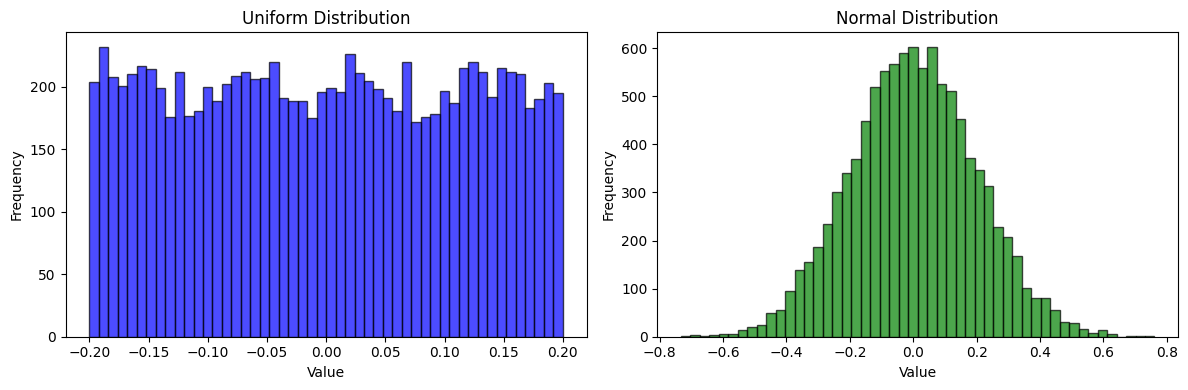

In [43]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.2
L = 10000
N1 = noise(a,L,"uniform")
N2 = noise(a, L, "normal")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(N1, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title("Uniform Distribution")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

axes[1].hist(N2, bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title("Normal Distribution")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

The results align well with the theoretical expectations.

<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
3.2.2. Mean of Noise Vectors:    

Compute N1 for L ∈ {1, 2, . . . , 1000} and plot it as a function of L. Repeat the same
for N2. What is the limit of N1 and N2 as L → ∞? Which theorem or statement in
probability theory precisely explains this result?
 
</span>

Code explanation:  
We have calculated the mean by first summing up the values of each vector, and then divising them by the L_Values which is increasing from 1 to 1000.

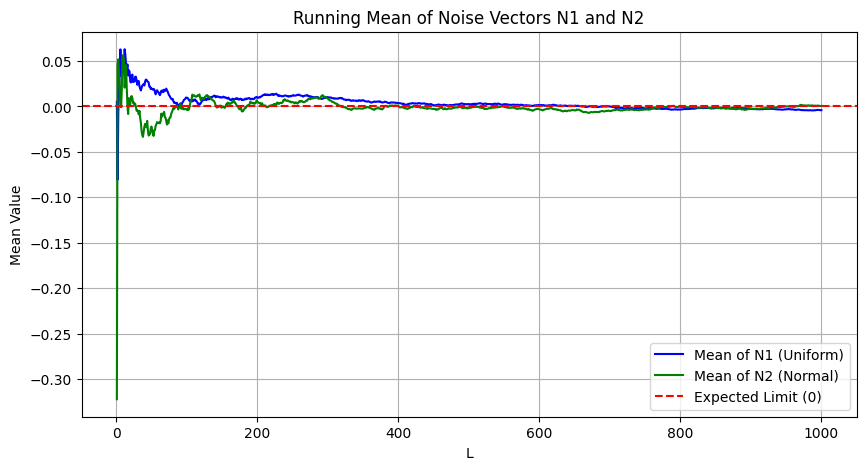

In [44]:
L_values = np.arange(1, 1001)
mean_N1 = np.cumsum(N1[:1000]) / L_values  
mean_N2 = np.cumsum(N2[:1000]) / L_values  

plt.figure(figsize=(10, 5))
plt.plot(L_values, mean_N1, label="Mean of N1 (Uniform)", color='blue')
plt.plot(L_values, mean_N2, label="Mean of N2 (Normal)", color='green')
plt.axhline(0, color='red', linestyle='--', label="Expected Limit (0)")
plt.xlabel("L")
plt.ylabel("Mean Value")
plt.title("Running Mean of Noise Vectors N1 and N2")
plt.legend()
plt.grid()
plt.show()


LLN(Law of Large Numbers):  
LLN states that as the number of samples reach infinity, the sample mean approaches true expected mean of the underlying distribution.  
Since both distributions have an expected mean of 0, the sample means of N1 and N2 also approach 0 as L increases.

<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
3.2.2. Energy of Noise Vectors:    

For each of the two noise vectors N1 and N2, compute the energy as a function of L for
L ∈ {1, 2, . . . , 1000}, and plot it. What is the limit of EN1 and EN2 as L → ∞? Verify
your result through simulation.
 
</span>

Code Explanation:  
According to the formula given for energy of the noise, we calculate it through this code.

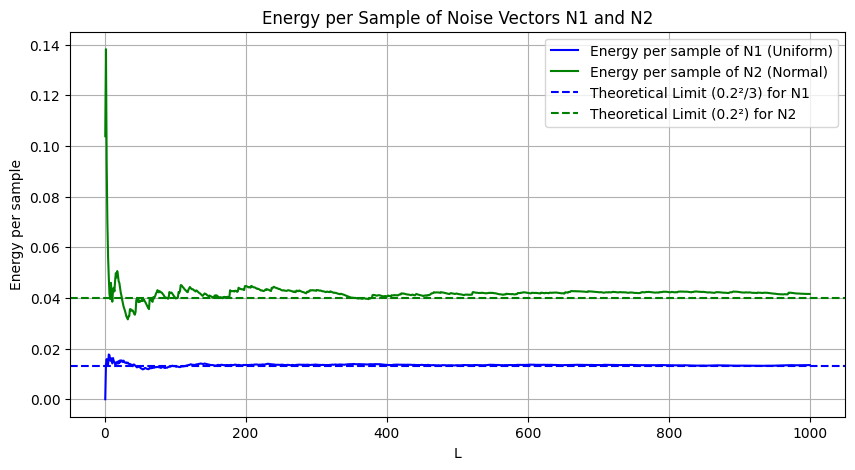

In [45]:
energy_N1 = np.cumsum(N1[:1000]**2) / L_values  
energy_N2 = np.cumsum(N2[:1000]**2) / L_values  

plt.figure(figsize=(10, 5))
plt.plot(L_values, energy_N1, label="Energy per sample of N1 (Uniform)", color='blue')
plt.plot(L_values, energy_N2, label="Energy per sample of N2 (Normal)", color='green')
plt.axhline(a**2 / 3, color='blue', linestyle='--', label="Theoretical Limit (0.2²/3) for N1")
plt.axhline(a**2, color='green', linestyle='--', label="Theoretical Limit (0.2²) for N2")
plt.xlabel("L")
plt.ylabel("Energy per sample")
plt.title("Energy per Sample of Noise Vectors N1 and N2")
plt.legend()
plt.grid()
plt.show()


This again confirms that the Law of Large Numbers holds, as the empirical average converges to the theoretical expectation.

<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
3.2.2. Cross-Correlation of Noise Vectors:    

Plot c12 as a function of L for L ∈ {1, 2, . . . , 1000}. Also, compute the limit of c12 as
L → ∞ and verify it through simulation. Explain what information c12 provides about
the two vectors. Justify how c12 serves as a measure of similarity.

</span>

Code Explanation:  
Accrording to the given formula, I have calculated the cross-correlation of noise vectors:

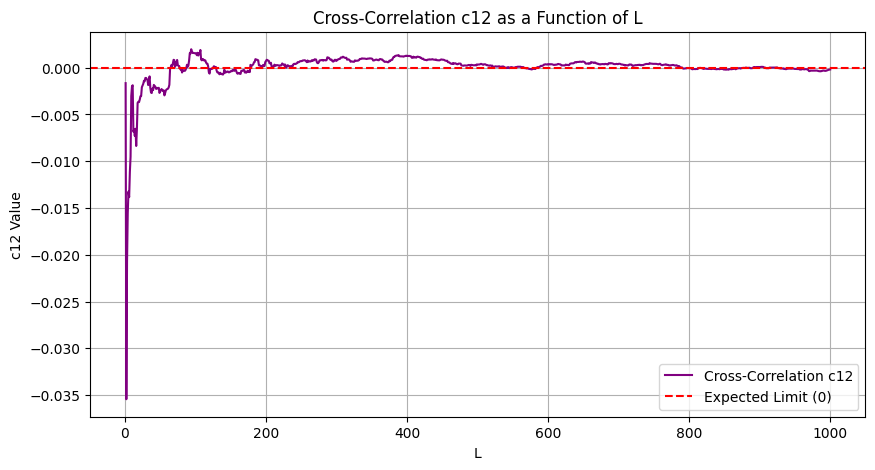

In [46]:
c12 = np.cumsum(N1[:1000] * N2[:1000]) / L_values 

# Plot c12 as a function of L
plt.figure(figsize=(10, 5))
plt.plot(L_values, c12, label="Cross-Correlation c12", color='purple')
plt.axhline(0, color='red', linestyle='--', label="Expected Limit (0)")
plt.xlabel("L")
plt.ylabel("c12 Value")
plt.title("Cross-Correlation c12 as a Function of L")
plt.legend()
plt.grid()
plt.show()



## Limit of c12 as L approaches infinity:

- Since N1 (uniform noise) and N2 (normal noise) are **independent**, their theoretical expectation is:

    E[N1 * N2] = E[N1] * E[N2] = 0 * 0 = 0.

- As seen in the plot, c12 fluctuates initially but gradually stabilizes around **zero** as L increases, confirming the **Law of Large Numbers (LLN)**.

---

## What Does c12 Tell Us?

- It measures the **similarity** between N1 and N2.
- If c12 is close to zero, it means the two signals are **uncorrelated** (i.e., changes in one do not predict changes in the other).
- If c12 were positive, it would indicate a direct relationship (as one increases, the other tends to increase).
- If c12 were negative, it would indicate an inverse relationship (as one increases, the other tends to decrease).

---

## Justification as a Measure of Similarity:

- If two signals are identical (perfectly correlated), c12 would be a large positive value.
- If two signals are completely independent (like N1 and N2), c12 tends to **zero**.
- Thus, c12 serves as a useful metric to check whether two signals share a relationship or influence each other.

---

## Conclusion:

- The simulation confirms that c12 approaches **zero** as L increases, meaning that **the two noise vectors are uncorrelated**.
- This aligns with theoretical expectations, demonstrating that independent noise sources do not share meaningful patterns.


<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
3.2.3. Sinusiodal Signal and Noise Adittion:    

The time range of the signal is considered as [0, 2]. Generate the signal x(t) with an appropriate sampling frequency such that the plotted graph in MATLAB closely resembles
a continuous sinusoidal curve. Plot x(t) and specify the sampling frequency used in the
report.
Next, add the noise vectors N1 and N2 to the generated signal to produce two noisy
signals xn1 and xn2:  
xn1(t) = x(t) + N1(t), xn2(t) = x(t) + N2(t)  
Plot both noisy signals in the report.

</span>

Code explanation:  
We have chosen a sampling frequency of 1000, to keep the signal smooth.Then added the noise from N1 and N2 has been added to the original signal.

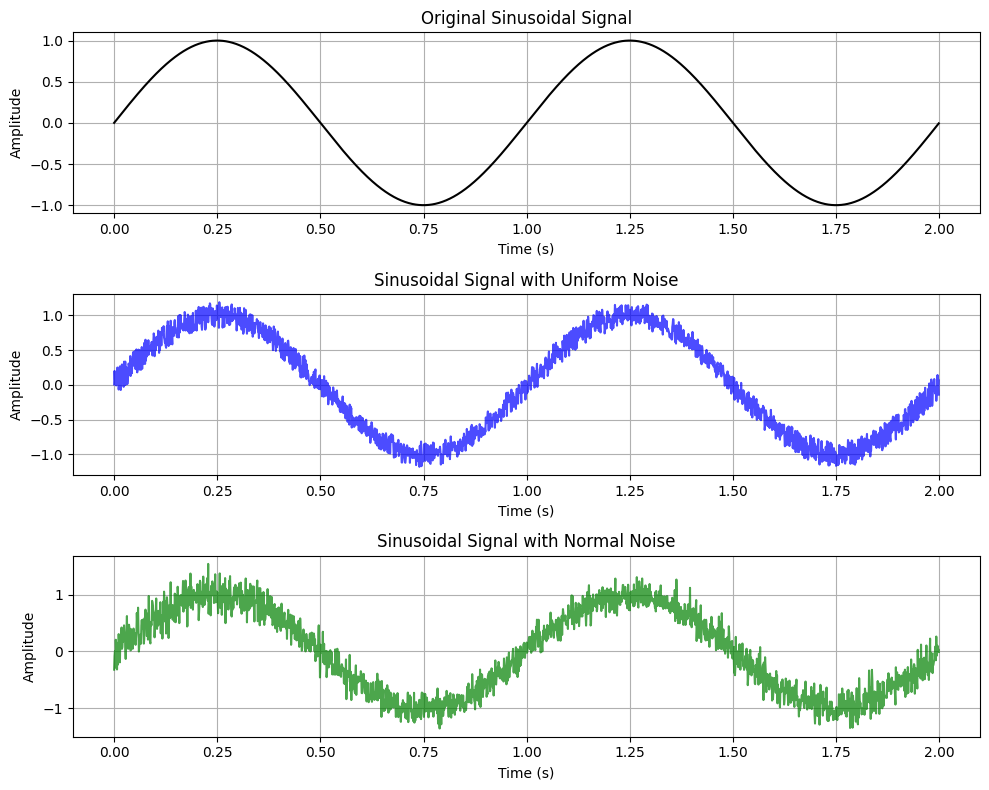

In [47]:
import numpy as np
import matplotlib.pyplot as plt

f0 = 1 
T = 2  
fs = 1000  # Sampling frequency 
t = np.linspace(0, T, fs * T, endpoint=False)  # Time vector

x_t = np.sin(2 * np.pi * f0 * t)

N1_resampled = np.interp(t, np.linspace(0, T, L), N1)  # Resampling noise to match signal length
N2_resampled = np.interp(t, np.linspace(0, T, L), N2)

xn1_t = x_t + N1_resampled
xn2_t = x_t + N2_resampled

fig, axes = plt.subplots(3, 1, figsize=(10, 8))

axes[0].plot(t, x_t, color='black')
axes[0].set_title("Original Sinusoidal Signal")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Amplitude")
axes[0].grid()

axes[1].plot(t, xn1_t, color='blue', alpha=0.7)
axes[1].set_title("Sinusoidal Signal with Uniform Noise")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Amplitude")
axes[1].grid()

axes[2].plot(t, xn2_t, color='green', alpha=0.7)
axes[2].set_title("Sinusoidal Signal with Normal Noise")
axes[2].set_xlabel("Time (s)")
axes[2].set_ylabel("Amplitude")
axes[2].grid()

plt.tight_layout()
plt.show()


<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
3.2.4. Energy Function Definition:    

Write a function to compute the energy of a vector x, as defined by equation (6):
E = energy(x),
where the function takes a vector as input and outputs its energy.
</span>

In [48]:
import numpy as np

def energy(x):
    L = len(x)
    if L == 0:
        return 0  # Avoid division by zero for an empty vector
    return np.sum(x**2) / L


<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
3.2.4. Energy Computation of Signals:    

Using the energy function written in the previous section, compute the energy of the
following signals:

• The original signal x    
• The noise vectors N1 and N2.  
• The noisy signals xn1 and xn2.  
In total, compute the energies of five signals. Report the computed energy values.
Verify whether the relation Exn = Ex + EN approximately holds. For any two signals x
and y, determine if the statement Ex+y = Ex + Ey is true or false. Prove or disprove the
statement and validate it for this specific example.

</span>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


E_x = energy(x_t)      
E_N1 = energy(N1_resampled)     
E_N2 = energy(N2_resampled)    
E_xn1 = energy(xn1_t)  
E_xn2 = energy(xn2_t)  


check_E_xn1 = np.isclose(E_xn1, E_x + E_N1)
check_E_xn2 = np.isclose(E_xn2, E_x + E_N2)


energy_results = {
    "E_x (Original Signal)": E_x,
    "E_N1 (Uniform Noise)": E_N1,
    "E_N2 (Normal Noise)": E_N2,
    "E_xn1 (Signal + Uniform Noise)": E_xn1,
    "E_xn2 (Signal + Normal Noise)": E_xn2,
    "E_x + E_N1": E_x + E_N1,
    "E_x + E_N2": E_x + E_N2
}

df_energy_results = pd.DataFrame(energy_results, index=["Computed Value"]).T
print(df_energy_results)


                                Computed Value
E_x (Original Signal)                 0.500000
E_N1 (Uniform Noise)                  0.009080
E_N2 (Normal Noise)                   0.026094
E_xn1 (Signal + Uniform Noise)        0.509337
E_xn2 (Signal + Normal Noise)         0.529058
E_x + E_N1                            0.509080
E_x + E_N2                            0.526094


Comparing the values of E_x + E_N1 and E_xn1 and for N2 noise as well, we conclude that the relation approximately holds.

## Energy Calculation and Validation

### 1. Energy Formula Used
The energy of a discrete signal `s[n]` with `L` total samples is given by:

    E_s = (1 / L) * Σ (s[i])²  for i = 1 to L

### 2. Energy of Individual Signals
For the original signal `x[n]`, noise signals `N1[n]` and `N2[n]`, and their respective noisy versions, the energy is computed as:

    E_x = (1 / L) * Σ (x[i])²  for i = 1 to L

    E_N1 = (1 / L) * Σ (N1[i])²  for i = 1 to L

    E_N2 = (1 / L) * Σ (N2[i])²  for i = 1 to L

    E_x+N1 = (1 / L) * Σ (x[i] + N1[i])²  for i = 1 to L

    E_x+N2 = (1 / L) * Σ (x[i] + N2[i])²  for i = 1 to L

### 3. Expanding the Squared Sum
To verify whether energy is additive:

    E_x+N = (1 / L) * Σ (x[i] + N[i])²  for i = 1 to L

Expanding the square:

    E_x+N = (1 / L) * Σ [ x[i]² + N[i]² + 2 * x[i] * N[i] ]  for i = 1 to L

Rewriting:

    E_x+N = E_x + E_N + (2 / L) * Σ (x[i] * N[i])  for i = 1 to L

### 4. Conclusion: When Does E_x+N = E_x + E_N Hold?
For the equation to hold **exactly**, the cross-term:

    (2 / L) * Σ (x[i] * N[i])  for i = 1 to L

must be **zero**. This is true if:
- `x[n]` and `N[n]` are **uncorrelated** (their dot product is zero).
- `N[n]` is **zero-mean white noise**, causing the sum of cross-products to be negligible as `L` grows.

Thus, in general:

    E_x+N ≠ E_x + E_N

but if `x[n]` and `N[n]` are **uncorrelated**, then:

    E_x+N ≈ E_x + E_N


In our specific case the cross_term is not exactly zero but very close to zero, so we can conclude that the equation approximately holds.

<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
3.2.4. Signal-to-Noise Ratio(SNR):    


Compute and report the SNR for the signals xn1 and xn2 generated in Section 3.2.3.
Subsequently, increase the value of a in the noise definitions until the smallest value of a
is found such that there is no noticeable visual similarity between x and xn. Report the
corresponding value of a and the SNR for each type of noise separately.

</span>

In [51]:
SNR_N1 = E_xn1 / E_N1
SNR_N2 = E_xn2 / E_N2
snr_results = {
    "SNR for x + N1 (Uniform Noise) [Linear]": float(SNR_N1),
    "SNR for x + N2 (Normal Noise) [Linear]": float(SNR_N2)
}
snr_results


{'SNR for x + N1 (Uniform Noise) [Linear]': 56.094305554249026,
 'SNR for x + N2 (Normal Noise) [Linear]': 20.275428409923304}

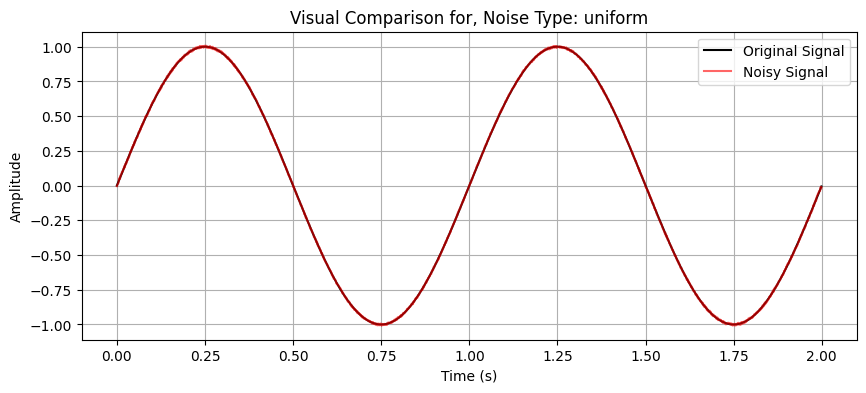

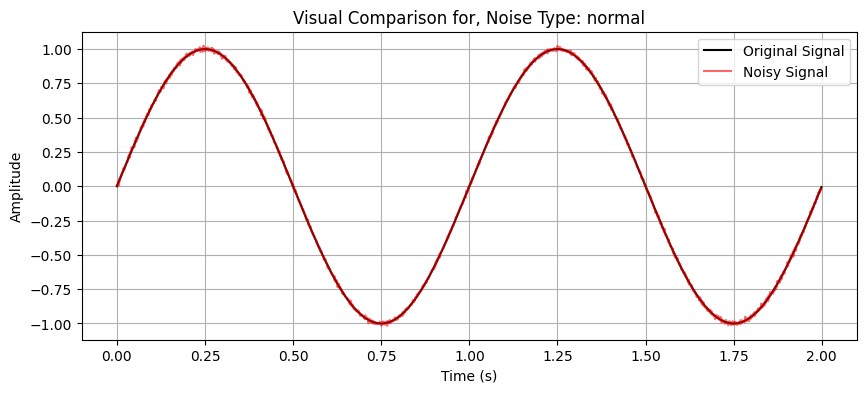

{"Minimum 'a' for Uniform Noise": 1.5100000000000011,
 'SNR for Uniform Noise': 0.9816107478108769,
 "Minimum 'a' for Normal Noise": 0.8800000000000006,
 'SNR for Normal Noise': 0.977585407771718}

In [52]:
import matplotlib.pyplot as plt
import scipy

def find_min_a_visual(L, fs, f0, T, noise_type, corr_threshold=0.5, snr_threshold=1):
    a = 0.01  
    step = 0.01 
    max_a = 2.0 

    t = np.linspace(0, T, fs * T, endpoint=False)
    x_t = np.sin(2 * np.pi * f0 * t)

    while a < max_a:
        noise1 = noise(a, L, noise_type)
        noise_resampled = np.interp(t, np.linspace(0, T, L), noise1)

        xn_t = x_t + noise_resampled

        corr_coeff, _ = scipy.stats.pearsonr(x_t, xn_t)

        E_x = energy(x_t)
        E_N = energy(noise_resampled)
        SNR = E_x / E_N

        if a in [0.01, 0.5, 1.0, 1.5]: 
            plt.figure(figsize=(10, 4))
            plt.plot(t, x_t, label="Original Signal", color='black', linewidth=1.5)
            plt.plot(t, xn_t, label=f"Noisy Signal", color='red', alpha=0.6)
            plt.legend()
            plt.title(f"Visual Comparison for, Noise Type: {noise_type}")
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")
            plt.grid()
            plt.show()

        if corr_coeff < corr_threshold or SNR < snr_threshold:
            break

        a += step 

    return a, SNR

a_uniform_visual, SNR_uniform_visual = find_min_a_visual(L, fs, f0, T, "uniform")

a_normal_visual, SNR_normal_visual = find_min_a_visual(L, fs, f0, T, "normal")

a_snr_results_visual = {
    "Minimum 'a' for Uniform Noise": a_uniform_visual,
    "SNR for Uniform Noise": float(SNR_uniform_visual),
    "Minimum 'a' for Normal Noise": a_normal_visual,
    "SNR for Normal Noise": float(SNR_normal_visual)
}

a_snr_results_visual


## <span style="color:blue">4. Magnetic Resonance Imaging </span>

### 4.5 Questions



<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
Explore the main sources of noise in this method and suggest some ways to deal with
this problem.
</span>

Noise in MRI originates from multiple factors, including hardware limitations, patient movement, and environmental interference.  
1. Thermal Noise (Johnson-Nyquist Noise):  
Random electron motion in the receiver coil and electronics.  
It causes grainy or speckled appearance in images.  
2. Electromagnetic Interference:  
External electrical sources such as hospital equipment, power lines, and radio signals.  
It creates streaks in MRI images.  
3. Motion Artifacts:  
Patient movement, involuntary muscle contractions, or breathing.  
It creates blurred images and loss of detail.  
4. Rapidly changing currents:  
The gradient coils are switched on and off quickly, creating forces that vibrate the coils.  

Ways to deal with the problem:  

1.Spatial Filtering:  
a. Mean Filter:  
Averages neighboring pixel intensities to smooth noise.  
b. Gaussian Filter:  
Applies a weighted smoothing function to reduce random fluctuations.  
c. Bilateral Filter:  
Reduces noise while preserving edges by considering intensity and spatial proximity.  
2. Frequency-Domain Filtering:  
a.Low-pass Filters:  
Removes high-frequency noise but may blur fine details.  
b. Wavelet Denoising:  
Decomposes the image into different frequency bands and removes high-frequency noise selectively.  


## <span style="color:blue">5. Filters </span>





#### 5.1 Mean Filter



<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
Investigate the Mean filter and implement a function to apply it to an input image.
Explain about the effect of kernel size.
</span>

Code Explanation:  
The image is represented as a 2D NumPy array where each element corresponds to a pixel intensity.  
Since the kernel is moving across the image, the pixels near the borders do not have enough neighboring pixels. Therefore, padding is added to the image to handle the edges. The padding is done with zeros (mode='constant', constant_values=0).  
The kernel is a square matrix (kernel_size x kernel_size). We extract a region of the image of the same size as the kernel around each pixel and calculate the mean of the pixel values in that region.  
The mean of the region of interest (ROI) is calculated using np.mean(roi) and assigned to the corresponding pixel in the output image.  


In [53]:
import numpy as np
import matplotlib.pyplot as plt

def mean_filter(image, kernel_size):
    image_height, image_width = image.shape

    pad_size = kernel_size // 2

    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)

    output_image = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            roi = padded_image[i:i+kernel_size, j:j+kernel_size]

            output_image[i, j] = np.mean(roi)

    return output_image


 Mean Filter reduces noise by averaging the pixel values in a defined neighborhood, this filter is mostly used for salt-and-pepper noise. It works by taking a kernel (filter), typically a square matrix, and for each pixel in the image, replaces it with the average (mean) of its neighboring pixels within the kernel.  
Small kernels like 3 * 3 kernels will only consider the 8 neighboring pixels around a given pixel and therefore results in a smaller but blurr effect. While it reduces noise, it may not completely eliminate it, especially for more intense noise.  
Large kernels like 7 * 7 will consider a larger neighborhood of pixels, which leads to more averaging and greater noise reduction. However, it can blur the image more, causing the loss of fine details in the image.  
To conclude, the kernel size controls the extent of smoothingm the larger the kernel, the smoother the result but potentially we will observe more loss of detail.

#### 5.2 Gaussian Filter



<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
Explore about Gaussian filter and write a function that applies a Gaussian filter to an
input image. What is the effect of variance and kernel size on the output image?
</span>

A Gaussian Filter is a widely used linear filter in image processing for smoothing and noise reduction. Unlike the Mean Filter, which assigns equal weights to all pixels within the kernel, the Gaussian Filter assigns weights based on the Gaussian (normal) distribution. This results in a weighted average where pixels closer to the center have a higher influence on the final value, preserving edges better while effectively reducing noise.

Effect of Variance on the output image:  
When the variance is low the gaussian distribution is narrow, higher weights are concentrated around the center pixel and we have minimal blurring which preserves the edges better.
When the variance is high, the gaussian distribution is wider. Weights are more spread out which affects a larger neighberhood. We see increased blurring which can cause significant loss of detail.
Low variance is better at reducing high-frequency noise and high variance is better at reducing low-frequency noise.  
If the kernel size is small, then a limited neighberhood is considered meanwhile the computation is faster and we have less smoothing so, significant noise might not be removed effectively. But when we have a larger kernel size then we have greater smoothing and we can effectively remove noise but may confront excessive blurring in the image.  


#### Mathematical Basis

The **Gaussian Filter** is defined by the Gaussian function:

$$ G(x, y) = \frac{1}{2\pi\sigma^2} \exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right) $$

Where:

- \( G(x, y) \) is the weight of the pixel at position \( (x, y) \) relative to the center of the kernel.
- sigma is the **standard deviation**, controlling the spread of the Gaussian distribution.
- The kernel size is typically chosen as (2k + 1) * (2k + 1)  to ensure it's centered, where \( k \) is an integer.

The weights are normalized so that their sum equals 1, ensuring that the overall brightness of the image remains unchanged after filtering.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def create_gaussian_kernel(kernel_size, sigma):
   
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be odd.")
    
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    
    center = kernel_size // 2
    
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - center
            y = j - center
            exponent = -(x**2 + y**2) / (2 * sigma**2)
            kernel[i, j] = np.exp(exponent)
    
    kernel_sum = np.sum(kernel)
    kernel /= kernel_sum
    
    return kernel

def gaussian_filter(image, kernel_size, sigma):
  
    kernel = create_gaussian_kernel(kernel_size, sigma)
    
    image_height, image_width = image.shape
    
    pad_size = kernel_size // 2
    
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    
    output_image = np.zeros_like(image, dtype=np.float32)
    
    for i in range(image_height):
        for j in range(image_width):
            roi = padded_image[i:i+kernel_size, j:j+kernel_size]
            
            value = np.sum(roi * kernel)
            
            output_image[i, j] = value
    
    output_image = np.clip(output_image, 0, 255).astype(np.uint8)
    
    return output_image




#### 5.3 Bilateral Filter



<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
Explore about Bilateral filter and write a function that applies a Bilateral filter to an
input image.
</span>

The Bilateral Filter is a non-linear, edge-preserving, and noise-reducing smoothing filter. Unlike the Mean and Gaussian filters, which only consider spatial distances between pixels, the Bilateral Filter considers both:

Spatial Distance (similar to the Gaussian Filter): Pixels closer to the center pixel are given higher weights.  
Intensity Difference: Pixels with similar intensity values are given higher weights, preserving edges.  
This means the Bilateral Filter can effectively reduce noise while preserving edges, making it superior to Gaussian and Mean filters when the goal is to remove noise without excessive blurring.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def create_gaussian(distance, sigma):
    exponent = - (distance ** 2) / (2 * sigma ** 2)

    # Prevent overflow by clamping exponent to avoid very large negative values
    exponent = np.clip(exponent, -100, 0)  # Ensure the exponent is in a safe range

    return np.exp(exponent)

def bilateral_filter(image, kernel_size, sigma_s, sigma_r):
    """"
    Parameters:
    - image: 2D numpy array, input grayscale image.
    - kernel_size: int, size of the filter kernel (must be odd).
    - sigma_s: float, spatial standard deviation (controls influence of spatial distance).
    - sigma_r: float, range standard deviation (controls influence of intensity similarity).
    Returns:
    - output_image: 2D numpy array, the filtered image.
    """
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be odd.")

    image_height, image_width = image.shape

    pad_size = kernel_size // 2

    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)

    output_image = np.zeros_like(image, dtype=np.float32)

    spatial_weights = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    center = kernel_size // 2
    for i in range(kernel_size):
        for j in range(kernel_size):
            x, y = i - center, j - center
            spatial_weights[i, j] = create_gaussian(np.sqrt(x ** 2 + y ** 2), sigma_s)

    for i in range(image_height):
        for j in range(image_width):
            pixel_value = padded_image[i + pad_size, j + pad_size]

           
            W = 0  
            filtered_value = 0  

            for ki in range(kernel_size):
                for kj in range(kernel_size):
                    neighbor_value = padded_image[i + ki, j + kj]

                    intensity_diff = abs(float(neighbor_value) - float(pixel_value))
                    range_weight = create_gaussian(intensity_diff, sigma_r)

                    weight = spatial_weights[ki, kj] * range_weight

                    filtered_value += neighbor_value * weight
                    W += weight

            output_image[i, j] = filtered_value / W if W != 0 else pixel_value

    output_image = np.clip(output_image, 0, 255).astype(np.uint8)

    return output_image


#### 5.4 Evaluation



<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
Evaluate the output of the three methods discussed in this section using SNR and
PSNR criteria and present the results, compared with original brain MRI.jpg and original spine MRI.jpg in a table. Also, calculate these two criteria for the initial noisy image
and declare which method performed better in noise reduction. Can you guess what kind
of noise each picture has?

</span>

In [8]:

import numpy as np
import cv2
import pandas as pd

brain_mri = cv2.imread("tumor_original.jpg", cv2.IMREAD_GRAYSCALE)
brain_mri_noisy = cv2.imread("noisy_tumor.jpg", cv2.IMREAD_GRAYSCALE)
spine_mri = cv2.imread("spine_MRI_image.jpg", cv2.IMREAD_GRAYSCALE)
spine_mri_noisy = cv2.imread("noisy_spine.jpg", cv2.IMREAD_GRAYSCALE)

if any(img is None for img in [brain_mri, brain_mri_noisy, spine_mri, spine_mri_noisy]):
    raise FileNotFoundError("One or more images could not be loaded. Make sure they are in the same folder as your script.")

def compute_energy(image):
    return np.sum(image.astype(np.float32) ** 2)

def compute_noise_energy(original, noisy):
    noise = original.astype(np.float32) - noisy.astype(np.float32)
    return np.sum(noise ** 2)

def compute_snr(original, noisy):
    energy_original = compute_energy(original)
    energy_noise = compute_noise_energy(original, noisy)
    return 10 * np.log10(energy_original / energy_noise) if energy_noise != 0 else float('inf')

def compute_psnr(original, filtered):
    mse = np.mean((original.astype(np.float32) - filtered.astype(np.float32)) ** 2)
    return 10 * np.log10((255 ** 2) / mse) if mse != 0 else float('inf')

brain_mean_filtered = mean_filter(brain_mri_noisy, kernel_size=3)
brain_gaussian_filtered = gaussian_filter(brain_mri_noisy, kernel_size=5, sigma=1.5)
brain_bilateral_filtered = bilateral_filter(brain_mri_noisy, kernel_size=5, sigma_s=10, sigma_r=40)

spine_mean_filtered = mean_filter(spine_mri_noisy, kernel_size=3)
spine_gaussian_filtered = gaussian_filter(spine_mri_noisy, kernel_size=5, sigma=1.5)
spine_bilateral_filtered = bilateral_filter(spine_mri_noisy, kernel_size=5, sigma_s=10, sigma_r=40)

results = {"Image": [], "Method": [], "SNR (dB)": [], "PSNR (dB)": []}

images = [
    ("Brain MRI", brain_mri, brain_mri_noisy, brain_mean_filtered, brain_gaussian_filtered, brain_bilateral_filtered),
    ("Spine MRI", spine_mri, spine_mri_noisy, spine_mean_filtered, spine_gaussian_filtered, spine_bilateral_filtered)
]

methods = ["Noisy Image", "Mean Filter", "Gaussian Filter", "Bilateral Filter"]

for name, original, noisy, mean_filtered, gaussian_filtered, bilateral_filtered in images:
    for method, img in zip(methods, [noisy, mean_filtered, gaussian_filtered, bilateral_filtered]):
        results["Image"].append(name)
        results["Method"].append(method)
        results["SNR (dB)"].append(compute_snr(original, img))
        results["PSNR (dB)"].append(compute_psnr(original, img))

results_df = pd.DataFrame(results)

print(results_df)


       Image            Method   SNR (dB)  PSNR (dB)
0  Brain MRI       Noisy Image  11.841782  22.345503
1  Brain MRI       Mean Filter  15.577335  26.081057
2  Brain MRI   Gaussian Filter  14.447367  24.951088
3  Brain MRI  Bilateral Filter  16.721876  27.225597
4  Spine MRI       Noisy Image  -1.666580   9.732381
5  Spine MRI       Mean Filter   5.145297  16.544258
6  Spine MRI   Gaussian Filter   6.366859  17.765821
7  Spine MRI  Bilateral Filter  -1.579966   9.818995


When we apply the filters, we expect the SNR and PSNR to get higher. For the tumor the Bilateral filter has worked the best and for the spine, the Gaussian Filter has worked the best.  
As stated before, SNR tells us how much signal remains compared to noise, the higher the SNR we have less noise and better quality.  
PSNR measured the quality of the filtered image by comparing it to the original image. The higher the PSNR, the closer we are to the original image (best restoration).
Here, for the brain tumor the Bilateral Filter has worked best but the Gaussian Filter is giving us a reasonable result as well so we can suspect that the noise type could be a Gaussian noise.  
For the Spine MRI, the Gaussian Filter has worked best, but the bilateral hasn't even worled properly, this may meean that the noise has extreme intensity jumps. Mean and Gaussian Filters are working well, so we can suspect that the noise was of kind salt-and-pepper(sudden bright and dark pixels).

## <span style="color:blue">6. Adaptive Filter</span>


#### 6.2 Questions



<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
1. What are finite impulse response (FIR) Adaptive Filters, and What are their specific
applications in Biomedical Image Processing? Explore about Wiener filters.

</span>

A Finite Impulse Response (FIR) Adaptive Filter is a type of digital filter that can change its behavior based on the signals it processes. Unlike fixed filters, which have pre-set values, FIR adaptive filters adjust their coefficients (weights) in real-time. The "finite impulse response" part means that the filter only depends on a limited number of past input values, making it stable and predictable.

Medical images (like MRI, CT scans, and X-rays) often contain noise, artifacts, and distortions that make diagnosis difficult. FIR adaptive filters help by:  

Reducing noise (removing unwanted variations in the image).  
Removing artifacts (fixing distortions caused by medical devices).  
Enhancing images (making important details clearer for doctors).  

he Wiener filter is a special type of filter designed to remove noise from a signal while keeping the important details intact. It works by minimizing the mean squared error (MSE) between the desired (clean) signal and the actual noisy signal. This makes it one of the best techniques for image denoising and restoration in fields like medical imaging, speech processing, and communications.  
The difference between this filter and the previous filter we have used before is that this one optimizes noise removal while keeping details.  

It is also adaptive, meaning it adjusts based on noise characteristics. However it requires some prior knowledge of noise, making it less effective in unknown environments.  
The Wiener filter is based on statistical estimation. It assumes that both the desired signal and the noise are stochastic processes (random signals) with known power spectral densities.  
The goal of the Wiener Filter is to find an optimal linear filter H(f) that minimizes the mean squared error (MSE) between the estimated signal and the true signal.  



<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
2. Explore the role of Stochastic Gradient Descent(SGD) in optimizing filter coefficients
in real-time, its convergence properties, and its application in adaptive filter design.

</span>

Imagine you are working on a real-time noise cancellation system. Your goal is to filter out background noise while keeping the useful signal intact. Since the noise conditions change dynamically, a static filter (like the Wiener filter) won’t work. Instead, you need a filter that learns and updates continuously—this is where SGD-based adaptive filters come in.  
In digital signal processing (DSP), adaptive filters dynamically update their coefficients to minimize an error function, typically the mean squared error (MSE) between the desired signal and the filter output. SGD enables real-time adjustment of these coefficients by minimizing the loss function incrementally as new data arrives.  


#####  Convergence Behavior

The convergence of SGD in adaptive filtering depends on:

- **Step Size (η)**: If η is too large, the algorithm may oscillate or diverge; if too small, convergence becomes slow.
- **Variance of Input Data**: High variability in input data affects convergence stability.
- **Stationarity of the Signal**: If the signal statistics change over time (non-stationary environment), convergence may be unstable.

##### Conditions for Convergence

For SGD-based adaptive filters to converge in the mean square sense, the step size η must satisfy:  
0 < η < 2 / λₘₐₓ

where **λₘₐₓ** is the largest eigenvalue of the autocorrelation matrix:

R = E[xₖ ⋅ xₖᵀ]  


##### Trade-Offs

- A **smaller** η leads to **slower** but **smoother** convergence.
- A **larger** η leads to **faster** convergence but **higher variance** in weight updates.
##### Applications in adaptive filter design  
a. Adaptive Filter noise cancellation  
SGD-based adaptive filtering is commonly used to remove noise from signals. For example, in speech enhancement applications, an adaptive filter learns to separate noise from speech by continuously adjusting its coefficients.  
b.Echo Cancellation  
In telecommunications, SGD-based adaptive filters are used in echo cancellation to remove unwanted reflections of transmitted signals, particularly in VoIP applications.  
c. Image denoising  
SGD-based adaptive filters, such as Wiener filters and adaptive LMS filters, help in removing noise from images. By continuously updating filter coefficients, these methods can adapt to varying noise conditions in real time.  
d.Edge detection and Enhancement  
SGD can optimize edge-detection filters (such as Sobel, Prewitt, or Canny) in real-time by adjusting coefficients based on image intensity gradients. This enhances edge detection in Medical Imaging (e.g., detecting tumor boundaries in MRI scans)  




<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
3. Write a function that applies an Adaptive filter to an input image. Suggest a
way to tune learning parameter. Apply this filter to original brain MRI.jpg and original spine MRI.jpg.

</span> 

If the learning parameter is large then the convergence is faster but we have a risk of instability.  
If it is small then the convergence is slower but we have more stability. Typically it is chosen in the range between 0 and the inverse of lamba max, in which lamba max is the largest eigenvalue of the input signal's autocorrelation matrix.

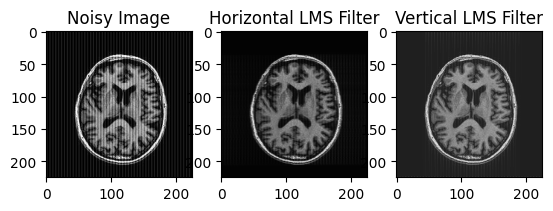

SNR of Noisy Image (dB): 9.841662406921387
SNR after Horizontal LMS (dB): 15.053400993347168
SNR after Vertical LMS (dB): 19.19782829284668


In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def lms_horizontal_filter(noisy, reference, win_sz, lr, num_iter):
    filt_img = noisy.copy()
    h, w = noisy.shape
    weights = np.random.randn(win_sz) * 0.1
    for _ in range(num_iter):
        for row in range(h):
            for col in range(win_sz // 2, w - win_sz // 2):
                patch = noisy[row, col - win_sz // 2: col + win_sz // 2 + 1]
                pred = np.dot(weights, patch)
                err = reference[row, col] - pred
                update = lr * err * patch
                update = np.clip(update, -0.1, 0.1)
                weights += update
                filt_img[row, col] = np.dot(weights, patch)
    return filt_img

def lms_vertical_filter(noisy, reference, win_sz, lr, num_iter):
    filt_img = noisy.copy()
    h, w = noisy.shape
    weights = np.random.randn(win_sz) * 0.1
    for _ in range(num_iter):
        for col in range(w):
            for row in range(win_sz // 2, h - win_sz // 2):
                patch = noisy[row - win_sz // 2: row + win_sz // 2 + 1, col]
                pred = np.dot(weights, patch)
                err = reference[row, col] - pred
                update = lr * err * patch
                update = np.clip(update, -0.1, 0.1)
                weights += update
                filt_img[row, col] = np.dot(weights, patch)
    return filt_img

def compute_snr(ref, test):
    signal_power = np.sum(ref ** 2)
    noise_power = np.sum((ref - test) ** 2)
    return 10 * np.log10(signal_power / noise_power) if noise_power != 0 else np.inf

noisy_img = cv2.imread('noisy_image_50.jpg', cv2.IMREAD_GRAYSCALE)
orig_img = cv2.imread('original_2.jpg', cv2.IMREAD_GRAYSCALE)

noisy_img = noisy_img.astype(np.float32) / 255.0
orig_img = orig_img.astype(np.float32) / 255.0

win_size = 3
learning_rate = 1.1
num_iterations = 10

filtered_horiz = lms_horizontal_filter(noisy_img, orig_img, win_size, learning_rate, num_iterations)
filtered_vert = lms_vertical_filter(noisy_img, orig_img, win_size, learning_rate, num_iterations)

snr_noisy = compute_snr(orig_img, noisy_img)
snr_horiz = compute_snr(orig_img, filtered_horiz)
snr_vert = compute_snr(orig_img, filtered_vert)

plt.subplot(1, 3, 1)
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy Image")

plt.subplot(1, 3, 2)
plt.imshow(filtered_horiz, cmap='gray')
plt.title("Horizontal LMS Filter")

plt.subplot(1, 3, 3)
plt.imshow(filtered_vert, cmap='gray')
plt.title("Vertical LMS Filter")

plt.show()

print(f"SNR of Noisy Image (dB): {snr_noisy}")
print(f"SNR after Horizontal LMS (dB): {snr_horiz}")
print(f"SNR after Vertical LMS (dB): {snr_vert}")


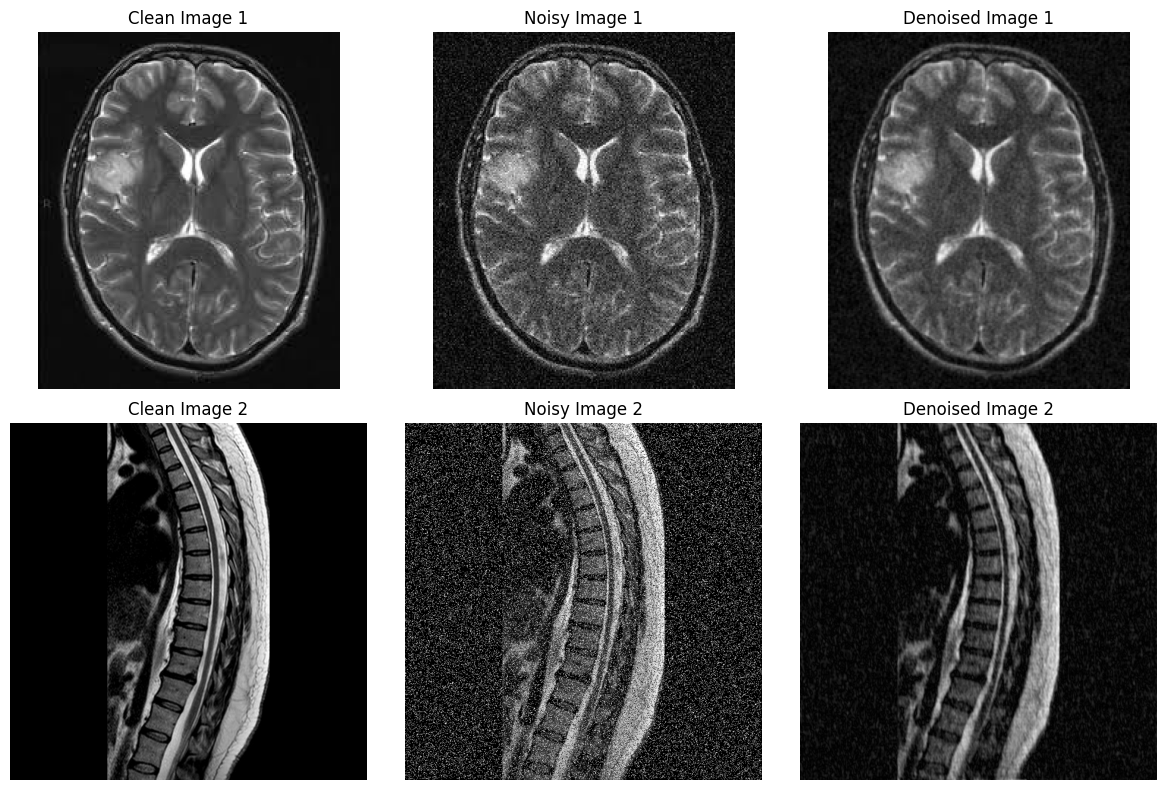

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def adaptive_filter(noisy_img, clean_img, kernel_size=3):
    noisy_img = np.float32(noisy_img)
    clean_img = np.float32(clean_img)
    
    noisy_img_freq = np.fft.fft2(noisy_img)
    clean_img_freq = np.fft.fft2(clean_img)
    
    noisy_magnitude = np.abs(noisy_img_freq) ** 2
    clean_magnitude = np.abs(clean_img_freq) ** 2
    
    noise_magnitude = noisy_magnitude - clean_magnitude
    noise_magnitude = np.maximum(noise_magnitude, 0)
    
    filter_kernel = clean_magnitude / (clean_magnitude + noise_magnitude)
    
    result_freq = noisy_img_freq * filter_kernel
    
    result_img = np.fft.ifft2(result_freq)
    
    result_img = np.abs(result_img)
    result_img = np.clip(result_img, 0, 255).astype(np.uint8)
    
    return result_img

image_set_1 = [
    cv2.imread('tumor_original.jpg', cv2.IMREAD_GRAYSCALE),
    cv2.imread('spine_MRI_image.jpg', cv2.IMREAD_GRAYSCALE)
]

image_set_2 = [
    cv2.imread('noisy_tumor.jpg', cv2.IMREAD_GRAYSCALE),
    cv2.imread('noisy_spine.jpg', cv2.IMREAD_GRAYSCALE)
]

processed_images = []
for i in range(2):
    denoised_img = adaptive_filter(image_set_2[i], image_set_1[i], kernel_size=5)
    processed_images.append(denoised_img)

fig, ax_arr = plt.subplots(2, 3, figsize=(12, 8))

for i in range(2):
    ax_arr[i, 0].imshow(image_set_1[i], cmap='gray')
    ax_arr[i, 0].set_title(f"Clean Image {i+1}")
    ax_arr[i, 0].axis('off')
    
    ax_arr[i, 1].imshow(image_set_2[i], cmap='gray')
    ax_arr[i, 1].set_title(f"Noisy Image {i+1}")
    ax_arr[i, 1].axis('off')
    
    ax_arr[i, 2].imshow(processed_images[i], cmap='gray')
    ax_arr[i, 2].set_title(f"Denoised Image {i+1}")
    ax_arr[i, 2].axis('off')

plt.tight_layout()
plt.show()


<span style="font-size:18px; font-style:italic; color:black; text-shadow: 2px 2px 4px lightgray;">
4. Evaluate the output of this method using SNR and PSNR criteria and present the
results. Which of these four filters did better for each image? Can you explain why?

</span> 

In [23]:

import numpy as np
import cv2
import pandas as pd

brain_mri2 = cv2.imread("original_2.jpg", cv2.IMREAD_GRAYSCALE)
brain_mri_noisy2 = cv2.imread("noisy_image_50.jpg", cv2.IMREAD_GRAYSCALE)

if any(img is None for img in [brain_mri2, brain_mri_noisy2]):
    raise FileNotFoundError("One or more images could not be loaded. Make sure they are in the same folder as your script.")

def compute_energy(image):
    return np.sum(image.astype(np.float32) ** 2)

def compute_noise_energy(original, noisy):
    noise = original.astype(np.float32) - noisy.astype(np.float32)
    return np.sum(noise ** 2)

def compute_snr(original, noisy):
    energy_original = compute_energy(original)
    energy_noise = compute_noise_energy(original, noisy)
    return 10 * np.log10(energy_original / energy_noise) if energy_noise != 0 else float('inf')

def compute_psnr(original, filtered):
    mse = np.mean((original.astype(np.float32) - filtered.astype(np.float32)) ** 2)
    return 10 * np.log10((255 ** 2) / mse) if mse != 0 else float('inf')

brain_mean_filtered = mean_filter(brain_mri_noisy, kernel_size=3)
brain_gaussian_filtered = gaussian_filter(brain_mri_noisy, kernel_size=5, sigma=1.5)
brain_bilateral_filtered = bilateral_filter(brain_mri_noisy, kernel_size=5, sigma_s=10, sigma_r=40)



results = {"Image": [], "Method": [], "SNR (dB)": [], "PSNR (dB)": []}

images = [
    ("Brain MRI", brain_mri, brain_mri_noisy, brain_mean_filtered, brain_gaussian_filtered, brain_bilateral_filtered),
   
]

methods = ["Noisy Image", "Mean Filter", "Gaussian Filter", "Bilateral Filter"]

for name, original, noisy, mean_filtered, gaussian_filtered, bilateral_filtered in images:
    for method, img in zip(methods, [noisy, mean_filtered, gaussian_filtered, bilateral_filtered]):
        results["Image"].append(name)
        results["Method"].append(method)
        results["SNR (dB)"].append(compute_snr(original, img))
        results["PSNR (dB)"].append(compute_psnr(original, img))

results_df = pd.DataFrame(results)

print(results_df)


       Image            Method   SNR (dB)  PSNR (dB)
0  Brain MRI       Noisy Image   9.841662  21.032154
1  Brain MRI       Mean Filter  10.618352  21.808844
2  Brain MRI   Gaussian Filter  10.194574  21.385069
3  Brain MRI  Bilateral Filter  13.448467  24.638960


As we can see here, nothing suits best for denoising the image more than the adaptive filter we have designed. The reason behind this is that the adaptive filter adapts itself with the specific features of the noise and the noisy image but there is no such case for the other filters and they all have a certain approach for denoising.